In [1]:
from rnn import RNN
import copy, numpy as np

np.random.seed(0)

In [2]:
def bin2int(d):
    out = 0
    for index,x in enumerate(d):
        out += x*pow(2,index)
    return out

In [3]:
# training dataset generation
int2binary = {}
binary_dim = 8

largest_number = pow(2,binary_dim)
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)
for i in range(largest_number):
    int2binary[i] = np.flip(binary[i], axis=0)


In [4]:

# input variables
alpha = 0.1
input_dim = 2
hidden_dim = 16
output_dim = 1

arguments = {
    "input_dim": input_dim, 
    "hidden_dim": hidden_dim, 
    "output_dim":output_dim
}

In [13]:
# training logic, for one epoch
acc = 0
total_loss = 0

epochs = 50000

In [14]:
list_acc = []
list_loss = []

In [15]:
rnn = RNN(arguments)

for i in range(1, epochs+1):
# generate a simple addition problem (a + b = c)
    a_int = np.random.randint(largest_number/2) # int version
    a = int2binary[a_int] # binary encoding
    a = np.reshape(a, (1, -1, 1))

    b_int = np.random.randint(largest_number/2) # int version
    b = int2binary[b_int] # binary encoding
    b = np.reshape(b, (1, -1, 1))
    # true answer
    c_int = a_int + b_int
    c = int2binary[c_int]
    c = np.reshape(c, (1, -1, 1))
    X = np.concatenate((a,b), axis= 2)
    X = np.concatenate((X, X), axis= 0)
    y = c
    y = np.concatenate((y, y), axis= 0)

    if i%1000 == 0:
        output, hidden, loss = rnn.train(X, y, verbose = True)
    else:
        output, hidden, loss = rnn.train(X, y)

    # decode output
    d = list()
    for j in output:
        d.append(int(np.round(j[0])))
    predict_num = bin2int(np.squeeze(d))
    acc += int(predict_num == c_int)
    total_loss += loss

    if i%1000 == 0:
        print("Pred: " + ' '.join([str(i) for i in d]))
        print("True: " + ' '.join([str(i[0]) for i in c[0]]))

        a_int = bin2int(np.squeeze(a))
        b_int = bin2int(np.squeeze(b))
        out = bin2int(np.squeeze(d))

        print(str(a_int) + " + " + str(b_int) + " = " + str(out))
        print("------------")
        print("Accuracy = {}".format(acc/1000.0))
        print("Total loss = {}".format(total_loss/1000.0))
        list_acc.append(acc)
        list_loss.append(total_loss)
        total_loss = 0
        acc = 0

Pred: 0 0 0 1 0 0 1 0
True: 0 1 1 0 1 0 0 1
32 + 118 = 72
------------
Accuracy = 0.003
Total loss = 3.992331041563451
Pred: 0 0 0 0 0 0 0 0
True: 0 1 1 1 0 0 1 0
66 + 12 = 0
------------
Accuracy = 0.007
Total loss = 3.9569726041278166
Pred: 1 1 0 1 0 1 0 0
True: 1 1 0 1 1 1 0 0
31 + 28 = 43
------------
Accuracy = 0.073
Total loss = 3.806470459835929
Pred: 1 1 1 1 1 1 0 0
True: 1 1 1 1 1 1 0 0
45 + 18 = 63
------------
Accuracy = 0.248
Total loss = 3.2693231708250785
Pred: 0 0 1 0 0 0 0 1
True: 0 0 1 0 0 0 0 1
121 + 11 = 132
------------
Accuracy = 0.497
Total loss = 2.4130904677454628
Pred: 0 0 0 0 1 1 1 0
True: 0 0 0 0 1 1 1 0
12 + 100 = 112
------------
Accuracy = 0.689
Total loss = 1.7289196474989645
Pred: 0 0 1 1 1 1 0 1
True: 0 0 1 1 1 1 0 1
74 + 114 = 188
------------
Accuracy = 0.891
Total loss = 1.1404953240545954
Pred: 1 1 0 1 1 1 1 0
True: 1 1 0 1 1 1 1 0
93 + 30 = 123
------------
Accuracy = 0.952
Total loss = 0.824837468394713
Pred: 1 0 0 1 0 1 0 0
True: 1 0 0 1 0 1 0 0


Text(0,0.5,'Acc')

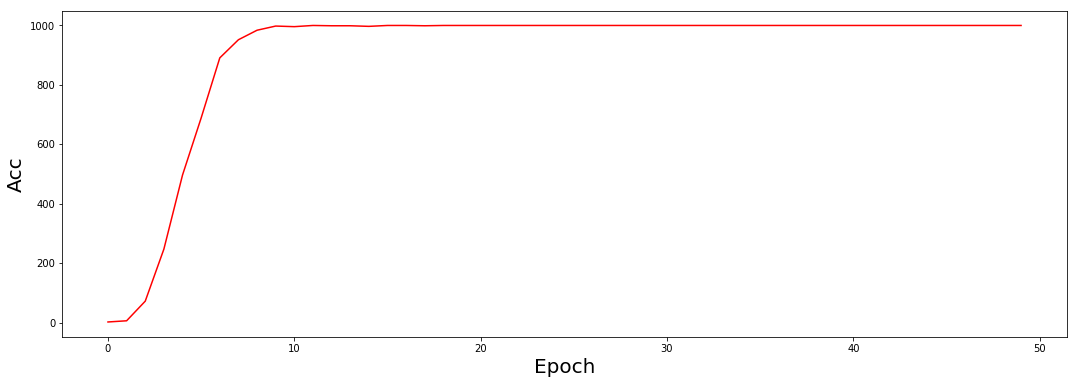

In [16]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.plot(list_acc, "-", color="r")
plt.xlabel("Epoch", fontsize=20)
plt.ylabel("Acc", fontsize=20)

Text(0,0.5,'Loss')

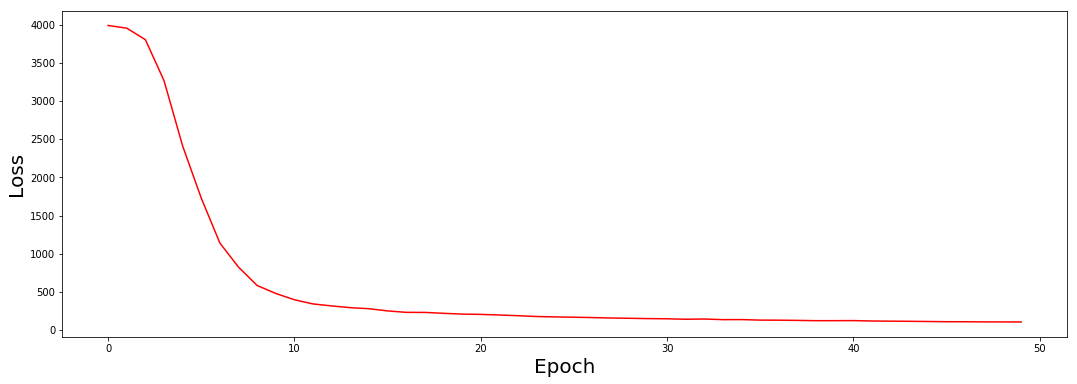

In [17]:
plt.figure(figsize=(18, 6))
plt.plot(list_loss, "-", color="r")
plt.xlabel("Epoch", fontsize=20)
plt.ylabel("Loss", fontsize=20)